In [1]:
import numpy as np
from scipy.integrate import solve_ivp
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def ode(t, z, g, a):
    u1, u2, u3 = z
    g1, g2, g3 = g
    
    e1 = g1*u1-a[0,0]*u1-a[0,1]*u1*u2-a[0,2]*u1*u3
    e2 = g2*u2-a[1,1]*u2-a[1,0]*u1*u2-a[1,2]*u2*u3
    e3 = g3*u3-a[2,2]*u3-a[2,1]*u3*u2-a[2,0]*u1*u3
    return [e1, e2, e3]

In [396]:
g_coef = np.array([0.0232 , 0.09 , 0.004])
konk_coef = np.array([[ 0.03, -0.00115 , -0.0002],
                     [0.0006 ,  0.001, 0.0009],
                     [ -0.0004  , 0.000223,  0.0211 ]])

In [391]:
l = 12
sol = solve_ivp(ode, t_span=range(0, l), y0=[211, 200, 211], args=(g_coef, konk_coef), dense_output=True)

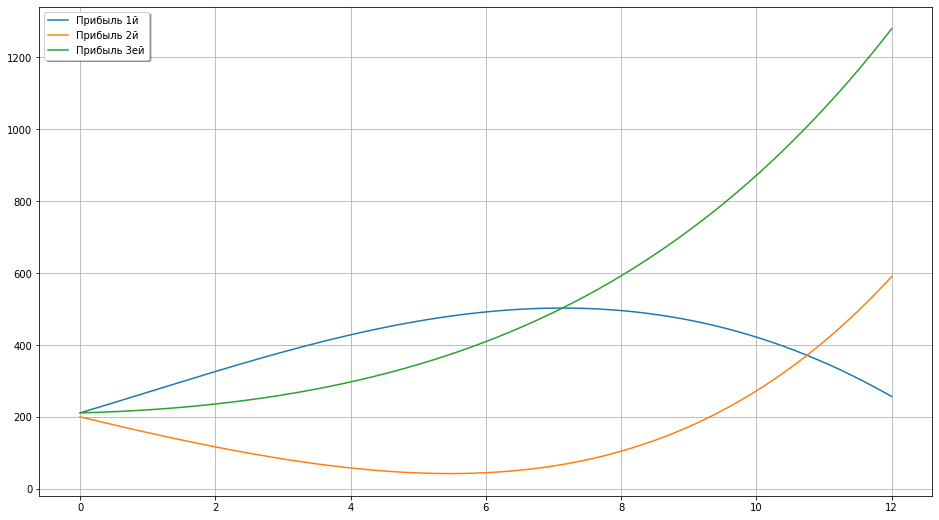

In [392]:
t = np.linspace(0, l, 500)
plt.figure(figsize=(16,9))
z = sol.sol(t)
plt.plot(t, z.T)
plt.legend(['Прибыль 1й', 'Прибыль 2й', 'Прибыль 3ей'], shadow=True)
plt.grid()
plt.show()

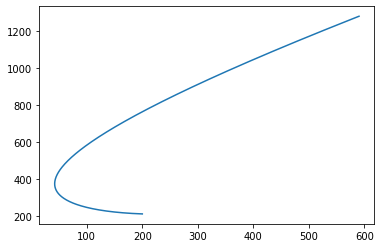

In [393]:
plt.plot(sol.sol(t)[1, :], sol.sol(t)[2, :])

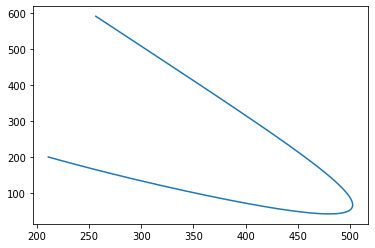

In [394]:
plt.plot(sol.sol(t)[0, :], sol.sol(t)[1, :])

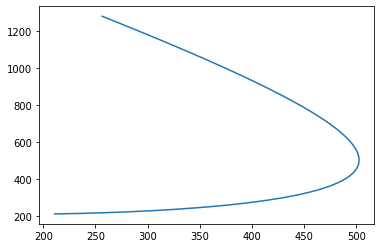

In [395]:
plt.plot(sol.sol(t)[0, :], sol.sol(t)[2, :])